In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter, ImageChops
import time
from p_tqdm import p_map

In [ ]:
img = Image.open("local/StringArt/pic2.jpg").convert("L").resize((200,200))

img1 = ImageEnhance.Contrast(img).enhance(1.0)
img1 = np.array(img1)
img1 = img1 + (255 - np.max(img1)) 
img2 = ImageChops.invert(img.filter(ImageFilter.FIND_EDGES))
img2 = (np.array(img2) < 200) * 255
a = np.clip(img1 - img2, 0, 255).astype(np.uint8)
# a = np.clip(img1, 0, 255).astype(np.uint8)

dims = a.shape
c = np.array([dims[0]//2, dims[1]//2])
r = min(c)
print(f"Размер изображения: {2*r}×{2*r}")
b = np.array([[a[i+c[0]-r,j+c[1]-r] for j in range(2*r)] for i in range(2*r)])
mask = np.array([[((i-r)**2 + (j-r)**2 <= r**2) for j in range(2*r)] for i in range(2*r)])
ij = []
for i in range(2*r):
    for j in range(2*r):
        if mask[i,j]:
            ij.append([i, j])
ij_numpy = np.matrix(ij).T
ij_tuple = [i[0] for i in ij], [i[1] for i in ij]


fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax[0][0].imshow(img1, cmap='gray') 
ax[0][1].imshow(img2, cmap='gray') 
ax[1][0].imshow(Image.fromarray(b*mask, mode='L'), cmap='gray') 
tmp = b.ravel()
ax[1][1].scatter(np.zeros(len(tmp)), tmp) 
ax[1][1].set_ylim([0, 255])
ax[0][0].set_title("Исходное изображение")
ax[0][1].set_title("Контуры")
ax[1][0].set_title("Сомещенное изображение")
ax[1][1].set_title("Расредеение черноо")
plt.show()

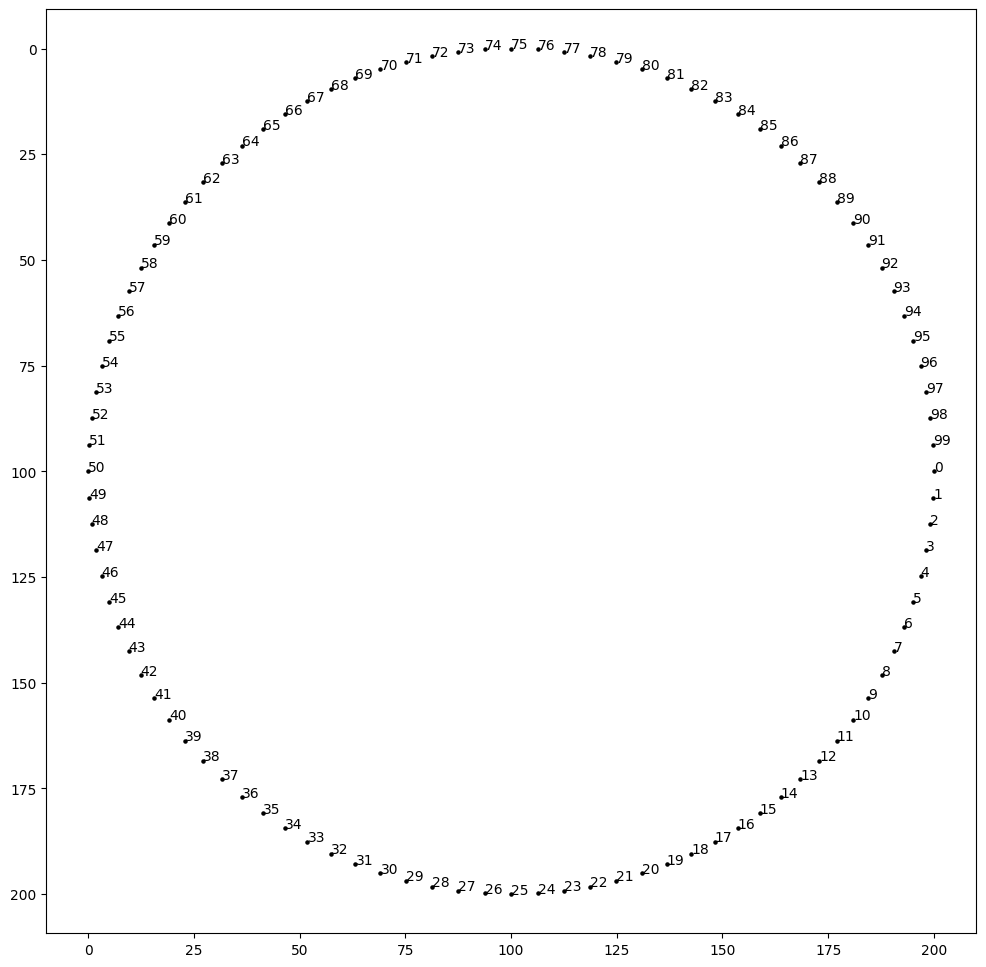

In [3]:
i_total = 100

node = [np.matrix([r + r*np.sin(i/i_total * 2*np.pi), r + r*np.cos(i/i_total * 2*np.pi)]).T for i in range(i_total)]

fig = plt.figure(figsize=(12, 12))
for i in range(i_total):
    y, x = np.array(node[i].T)[0]
    plt.scatter(x, y, 5, 'k')
    plt.text(x, y, i)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.show()

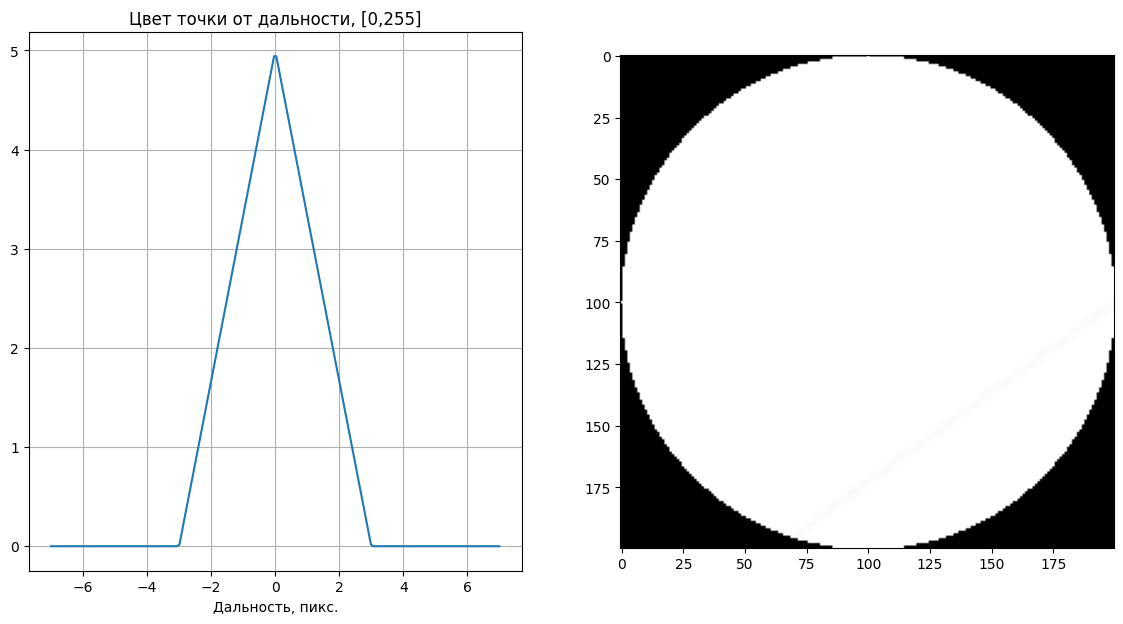

In [4]:
from numpy.linalg import norm

pixcol_c, pixcol_r0 = 5, 3
def pixcol(r):
    """Color of pixel by range r"""
    # return np.clip(2*pixcol_c * (-np.abs(r)+pixcol_r0) / pixcol_r0,0,pixcol_c)
    return np.clip(pixcol_c * (-np.abs(r)+pixcol_r0) / pixcol_r0,0,None)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
x = np.linspace(-7, 7, 200)
ax1.plot(x, pixcol(x))
ax1.grid()
ax1.set_title("Цвет точки от дальности, [0,255]")
ax1.set_xlabel("Дальность, пикс.")

#def d(p1,p2,p3):
#    """Расстояние от линии [P1=(x1,y1), P2=(x2,y2)] до точки P3=(x3,y3)"""
#    return np.abs((np.flip((p2-p1).T) * ij_numpy + p1[1]*p2[0] - p1[0]*p2[1])) / norm(p2-p1)

def d(p1, p2, points):
    """Расстояние от линии [P1, P2] до точек points"""
    x1, y1 = p1
    x2, y2 = p2
    # points имеет shape (2, N) - [x_coords, y_coords]
    x3 = points[0]  # все x координаты
    y3 = points[1]  # все y координаты
    
    numerator = np.abs((y2-y1)*x3 - (x2-x1)*y3 + x2*y1 - y2*x1)
    anw = 1e2
    try:
        anw = numerator / norm(p2-p1)
    except RuntimeWarning:
        print(f"p1 = {p1}")
        print(f"p2 = {p2}")
        print(f"num = {numerator}")
        print(f"den = {norm(p2-p1)}")
    except:
        print("RuntimeWarning не сработал!!!")
        print(f"p1 = {p1}")
        print(f"p2 = {p2}")
        print(f"num = {numerator}")
        print(f"den = {norm(p2-p1)}")
    return anw

c = np.ones((2*r, 2*r))*255
p1 = node[0]
p2 = node[30]
c[ij_tuple] -= np.array(pixcol(d(p1, p2, ij_numpy)))[0]

ax2.imshow(Image.fromarray(c.astype(np.uint8)*mask, mode='L'), cmap='gray')
plt.show()

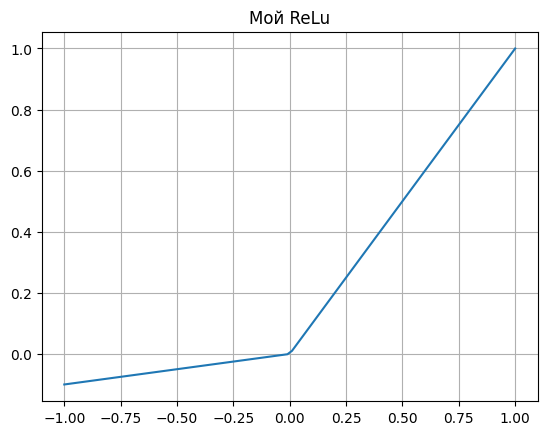

In [5]:
def get_e_by_node(i1, i2_list):
    e = []
    for i2 in i2_list:
        c = pic.copy()
        c[ij_tuple] -= np.array(pixcol(d(node[i1], node[i2], ij_numpy)))[0]
        # tmp = (np.abs(c-b)*mask).astype(np.uint8)
        tmp = (np.abs(ReLu(c-b))*mask).astype(np.uint8)
        e.append([i2, np.sum(tmp)])
    return e

def flatten(xss):
    return [x for xs in xss for x in xs]

def ReLu(x):
    # return np.clip(x, 0, None)
    return np.clip(x, None, 0) * 0.1 + np.clip(x, 0, None)

x = np.linspace(-1, 1, 100)
plt.title("Мой ReLu")
plt.plot(x, ReLu(x))
plt.grid()
plt.show()

In [6]:
def show_results():
    # Отображение рассчитанных результатов
    N = len(sequence)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    ax1.imshow(Image.fromarray(pic.astype(np.uint8), mode='L'), cmap='gray') 

    for i in range(N-1):
        i1 = sequence[i]
        i2 = sequence[i+1]
        x1, y1 = node[i1]
        x2, y2 = node[i2]
        ax2.plot([float(y1), float(y2)], [float(x1), float(x2)], 'k', alpha=0.05)
    ax2.axis('equal')
    ax2.yaxis.set_inverted(True)
    plt.show()

In [7]:
# Инициализация рассчёта
i1 = 0
pic = np.ones((2*r, 2*r))*255
sequence = [i1]
loss = []
counter = 0

1 / [0 -> 4000] | loss=3144556 (100%) | 0.9 c (0.01) мин
100 / [0 -> 4000] | loss=2834572 (90%) | 84.9 c (1.42) мин
200 / [0 -> 4000] | loss=2542122 (80%) | 169.6 c (2.83) мин
300 / [0 -> 4000] | loss=2262697 (71%) | 253.6 c (4.23) мин
400 / [0 -> 4000] | loss=2002472 (63%) | 339.1 c (5.65) мин


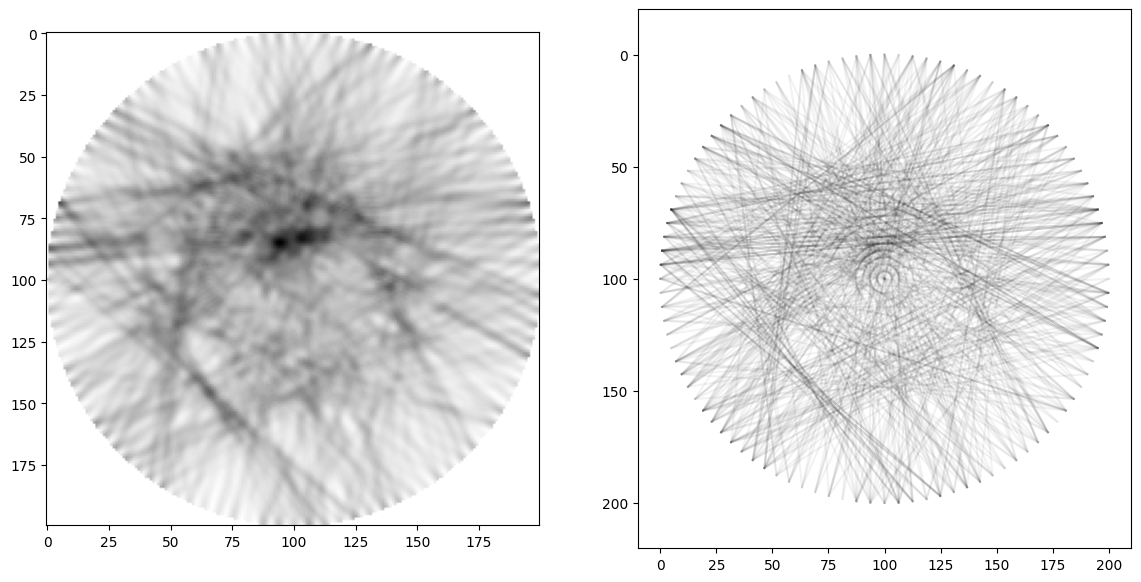

500 / [0 -> 4000] | loss=1762009 (56%) | 423.9 c (7.06) мин
600 / [0 -> 4000] | loss=1536128 (48%) | 509.2 c (8.49) мин
700 / [0 -> 4000] | loss=1328886 (42%) | 593.5 c (9.89) мин
800 / [0 -> 4000] | loss=1140697 (36%) | 679.0 c (11.32) мин
900 / [0 -> 4000] | loss=972943 (30%) | 764.2 c (12.74) мин


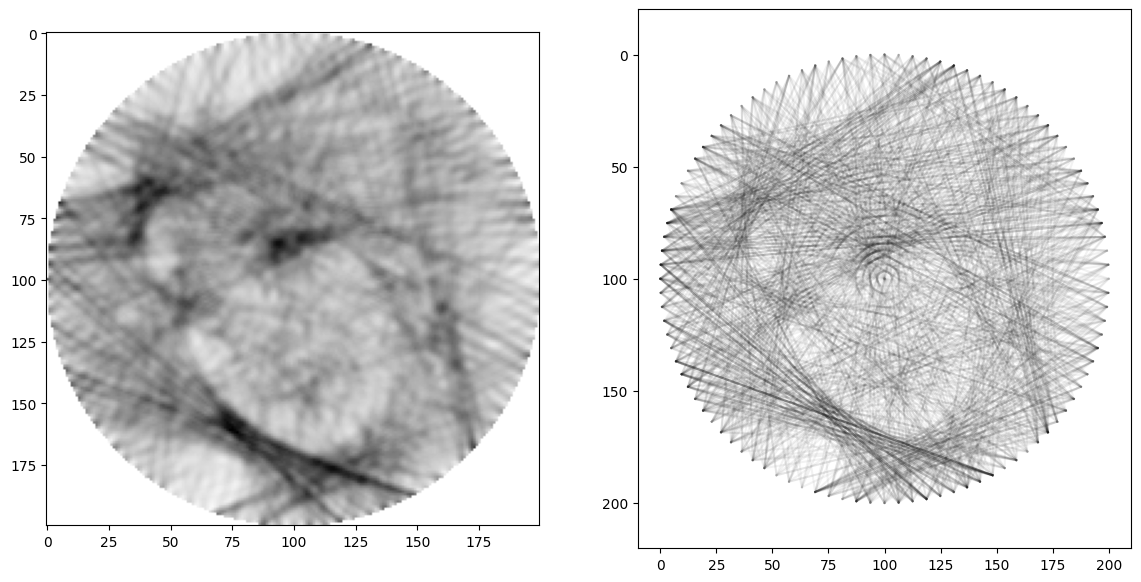

1000 / [0 -> 4000] | loss=825615 (26%) | 850.1 c (14.17) мин
1100 / [0 -> 4000] | loss=698532 (22%) | 935.8 c (15.60) мин
1200 / [0 -> 4000] | loss=591933 (18%) | 1020.0 c (17.00) мин
1300 / [0 -> 4000] | loss=503735 (16%) | 1106.7 c (18.44) мин
1400 / [0 -> 4000] | loss=433959 (13%) | 1193.7 c (19.89) мин


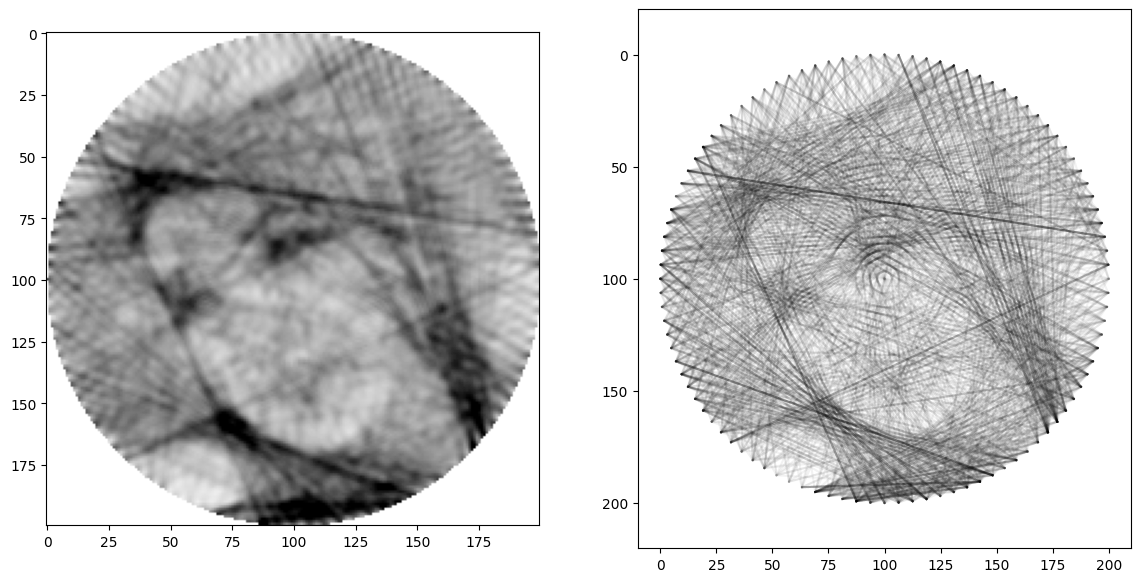

1500 / [0 -> 4000] | loss=381696 (12%) | 1282.2 c (21.37) мин
1600 / [0 -> 4000] | loss=345717 (10%) | 1368.7 c (22.81) мин
1700 / [0 -> 4000] | loss=318847 (10%) | 1456.3 c (24.27) мин
1800 / [0 -> 4000] | loss=297577 (9%) | 1542.4 c (25.71) мин
1900 / [0 -> 4000] | loss=281418 (8%) | 1627.1 c (27.12) мин


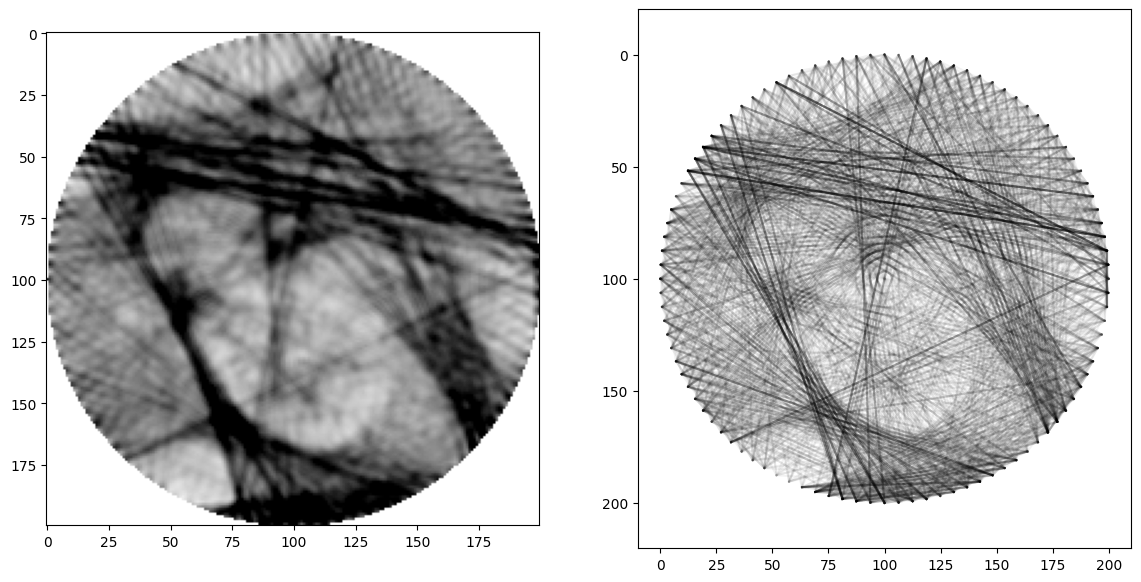

2000 / [0 -> 4000] | loss=270014 (8%) | 1715.0 c (28.58) мин
2100 / [0 -> 4000] | loss=262591 (8%) | 1802.2 c (30.04) мин
2200 / [0 -> 4000] | loss=257851 (8%) | 1888.8 c (31.48) мин
2300 / [0 -> 4000] | loss=255107 (8%) | 1975.3 c (32.92) мин
Достигнут предел точности!


In [8]:
# Рассчёт / дорассчёт
N = 4000
N_cpu = 5
counter_prev = counter
start_time = time.perf_counter()
surplus_max = surplus = 5

for _ in range(N):
    counter += 1
    next_candidates = np.array([i for i in range(i_total) if i!=i1])
    parts = np.array_split(next_candidates, N_cpu)
    e = p_map(get_e_by_node, 
              [i1 for _ in range(N_cpu)], 
              [i for i in parts], disable=True)
    e = [i[1] for i in sorted(flatten(e))]
    
    i2_best = next_candidates[e.index(min(e))]
    loss.append(min(e))
    pic[ij_tuple] -= np.array(pixcol(d(node[i1], node[i2_best], ij_numpy)))[0]
    pic = np.clip(pic, 0, 255)
    i1 = i2_best
    sequence.append(i1)
    if counter > 10:
        if (loss[-1] > loss[-2]) or (loss[-1]/loss[0] < 0.01):
            surplus -= 1
            if surplus <= 0:
                print(f"Достигнут предел точности!")
                break
        else:
            surplus = surplus_max
    
    if counter%500==0:
        show_results()
    
    if (counter%100==0) or (counter-counter_prev==1):
        end_time = time.perf_counter()
        t = end_time - start_time
        print(f"{counter} / [{counter_prev} -> {N + counter_prev}] | loss={loss[-1]} ({int(100*loss[-1]/loss[0])}%) | {(t):.1f} c ({(t/60):.2f}) мин")

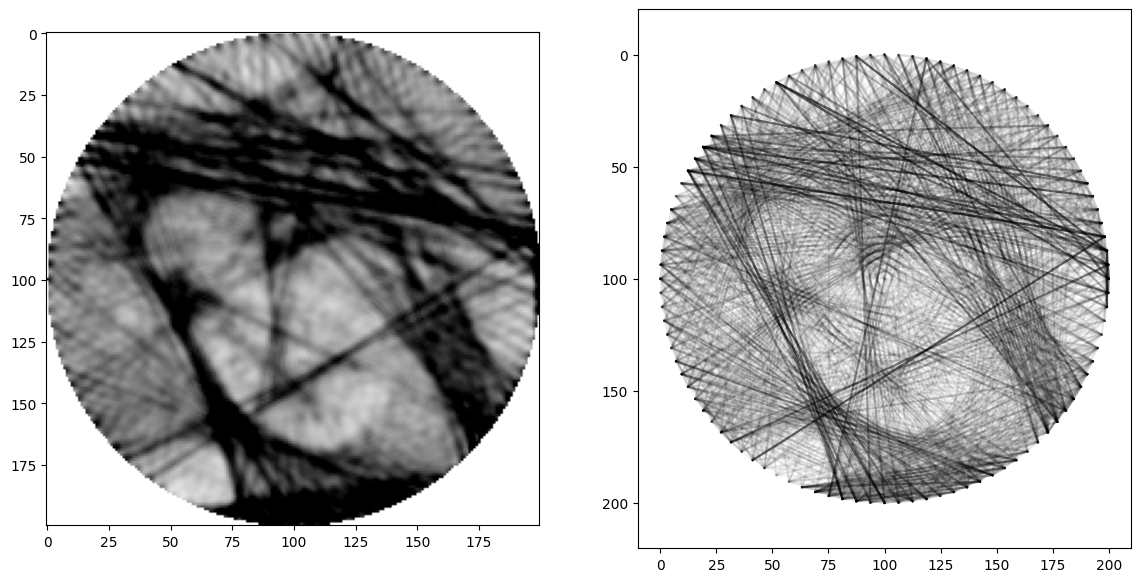

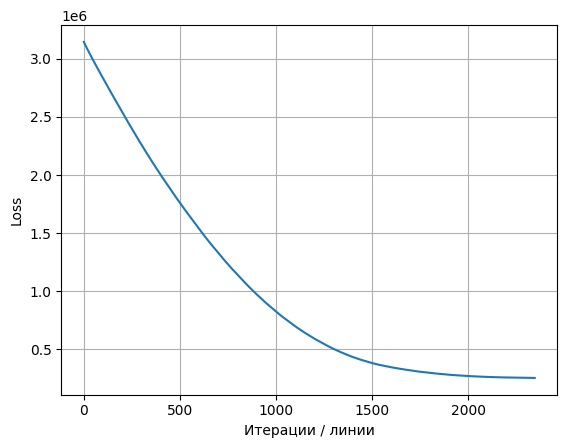

In [9]:
show_results()

plt.plot(loss)
plt.xlabel("Итерации / линии")
plt.ylabel("Loss")
plt.grid()
plt.show()

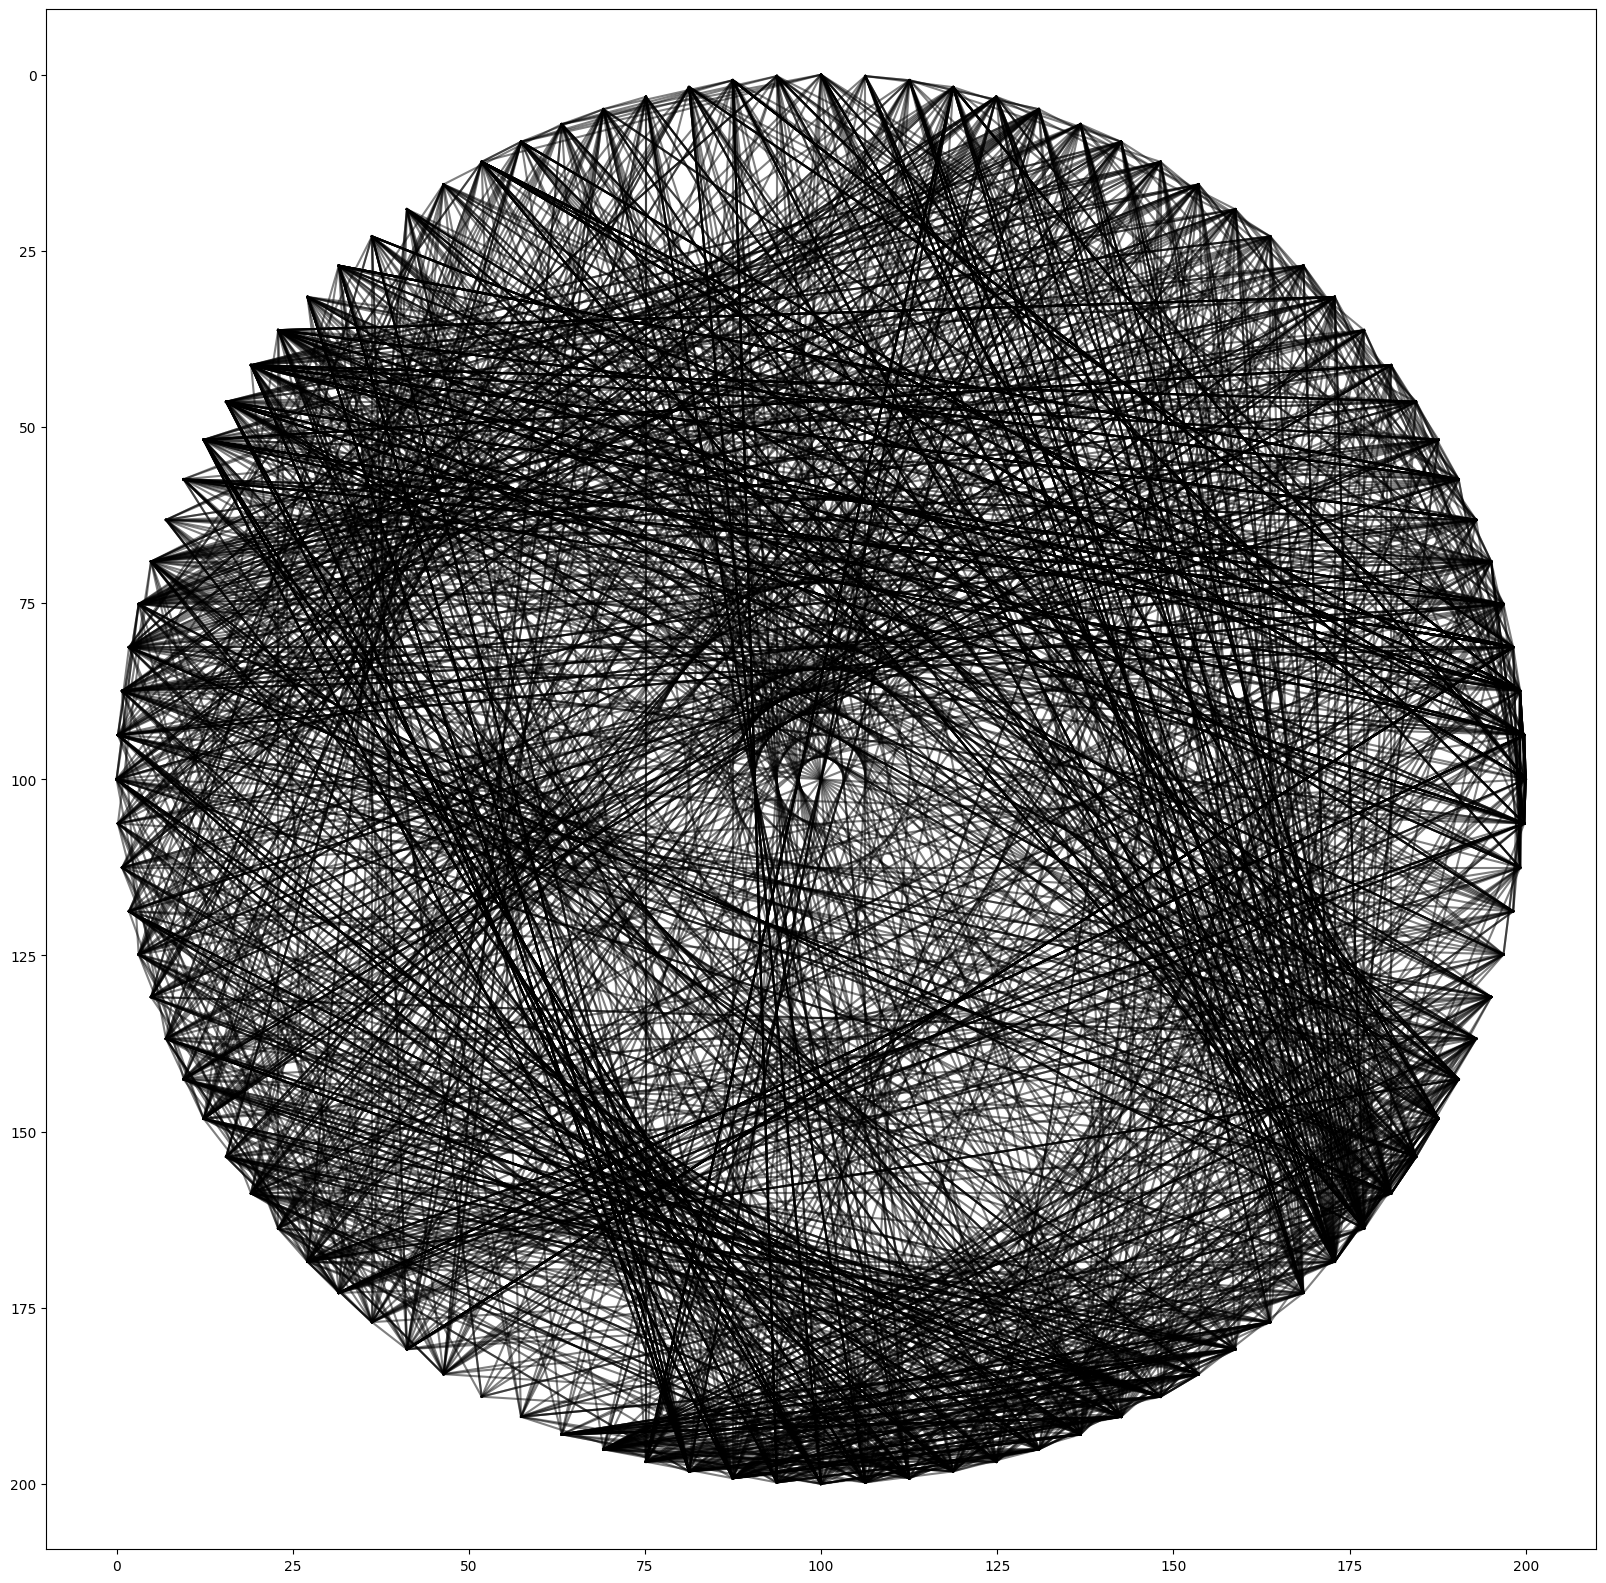

In [10]:
# Сохранение
name = "Al"

with open(f"local/StringArt/{name}.txt", "w") as f:
    f.write(f"im_size {r}\n")
    f.write(f"pixcol_c {pixcol_c}\n")
    f.write(f"pixcol_r0 {pixcol_r0}\n")
    f.write(f"iterations {counter}\n")
    f.write(f"nodes: {i_total}\n\n")
    for i in sequence:
        f.write(f"{i}\n")
        
fig = plt.figure(figsize=(20, 20))
for i in range(len(sequence)-1):
    i1 = sequence[i]
    i2 = sequence[i+1]
    x1, y1 = node[i1]
    x2, y2 = node[i2]
    plt.plot([float(y1), float(y2)], [float(x1), float(x2)], 'k', alpha=0.5)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.savefig(f"local/StringArt/{name}.jpg")